## 1. Create a new function to generate the data

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

n = 100
rsize = 0.25
xmin = 0
xmax = 100
x =np.sort(np.random.randint(low=xmin, high=xmax, size=(n,)))
rnd = np.random.rand(n)* rsize 

coeff = np.random.rand(3)* [10,3,1]

y = coeff[0] + coeff[1]*x + coeff[2]*x**2 + rnd

In [13]:
coeff

array([7.52476262, 2.32790498, 0.97266389])

In [14]:
x

array([ 0,  0,  2,  3,  3,  3,  5,  5,  5,  7,  7,  8, 10, 10, 10, 13, 13,
       14, 15, 15, 17, 17, 17, 18, 18, 19, 19, 20, 21, 24, 24, 24, 26, 26,
       26, 27, 29, 29, 29, 32, 32, 34, 34, 34, 35, 36, 37, 39, 39, 40, 40,
       41, 43, 44, 44, 45, 45, 47, 47, 50, 51, 51, 53, 55, 57, 57, 59, 60,
       61, 62, 62, 66, 66, 66, 67, 67, 70, 71, 73, 74, 78, 80, 81, 82, 83,
       83, 85, 86, 86, 88, 89, 91, 92, 93, 93, 97, 98, 98, 98, 99])

In [15]:
y

array([7.76415460e+00, 7.67663711e+00, 1.62662411e+01, 2.33973620e+01,
       2.34889777e+01, 2.33775867e+01, 4.35379064e+01, 4.36050179e+01,
       4.36139082e+01, 7.15630799e+01, 7.16516068e+01, 8.85087696e+01,
       1.28112044e+02, 1.28291903e+02, 1.28267971e+02, 2.02225787e+02,
       2.02305470e+02, 2.31001744e+02, 2.61397681e+02, 2.61424400e+02,
       3.28438419e+02, 3.28303185e+02, 3.28307356e+02, 3.64707874e+02,
       3.64810873e+02, 4.02971283e+02, 4.02955083e+02, 4.43258225e+02,
       4.85382781e+02, 6.23799322e+02, 6.23668741e+02, 6.23751679e+02,
       7.25751010e+02, 7.25603797e+02, 7.25715500e+02, 7.79562123e+02,
       8.93133503e+02, 8.93107144e+02, 8.93059629e+02, 1.07817456e+03,
       1.07805206e+03, 1.21110491e+03, 1.21112691e+03, 1.21126299e+03,
       1.28071741e+03, 1.35194949e+03, 1.42540980e+03, 1.57778114e+03,
       1.57795950e+03, 1.65708194e+03, 1.65706471e+03, 1.73820954e+03,
       1.90631357e+03, 1.99319886e+03, 1.99321877e+03, 2.08198133e+03,
      

In [16]:
len(x)

100

## 2. Put data into linear algebra form

In [17]:
A = np.zeros((n,3),dtype=np.float32)  #3 makes it a quadradic fit
            
for i in range(n):    
    A[i,0] = 1
    A[i,1]= x[i]
    A[i,2] = x[i] * x[i]

## 3. Use QR factorization to solve the linear system

In [18]:
def column_convertor(x):
    x.shape = (1, x.shape[0])
    return x

def householder_transformation(v):
    size_of_v = v.shape[1]
    e1 = np.zeros_like(v)             #Makes an array the same dim as v with zeros
    e1[0, 0] = 1                      #Changes the first value to 1
    vector = LA.norm(v) * e1
    if v[0, 0] < 0:
        vector = - vector
    u = (v + vector).astype(np.float32)
    H = np.identity(size_of_v) - ((2 * np.matmul(np.transpose(u), u)) / np.matmul(u, np.transpose(u)))
    return H

def qr_factorization(q, r, iter, n):  #Math stuff. Self note: DO NOT CHANGE!!!
    v = column_convertor(r[iter:, iter])
    Hbar = householder_transformation(v)
    H = np.identity(n)
    H[iter:, iter:] = Hbar
    r = np.matmul(H, r)
    q = np.matmul(q, H)
    return q, r

def myMatrix(A):
    n = len(A)
    m = len(A[0])
    
    true_min = min(n, m)                #Determine the number of iterations needed and used for trimming
    true_max = max(n, m)                #Used later for trimming
    
    Q = np.identity(n)
    R = A.astype(np.float32)
    
    for i in range(true_min):
        Q, R = qr_factorization(Q, R, i, n)
    
    if n == m:                          #Trim the matrices if they are too long
        R = R[:true_min, :true_min]
    elif n > m:
        Q = Q[:true_max, :true_min]
        R = R[:true_min, :true_min]
    else:
        R = R[:true_min, :true_max]
    
    R = np.round(R, decimals=6)         #Clean up R for decimals
    
    Q = np.round(Q, decimals=6)         #Clean up Q for decimals
    
    return Q, R

In [19]:
Q, R = myMatrix(A)

In [20]:
Qy = np.matmul(np.matrix.transpose(Q) ,y)

In [21]:
coeffScratch = np.linalg.solve(R,Qy)

## Compare your results

In [22]:
q,r =np.linalg.qr(A)

In [23]:
A

array([[1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00],
       [1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 7.000e+00, 4.900e+01],
       [1.000e+00, 7.000e+00, 4.900e+01],
       [1.000e+00, 8.000e+00, 6.400e+01],
       [1.000e+00, 1.000e+01, 1.000e+02],
       [1.000e+00, 1.000e+01, 1.000e+02],
       [1.000e+00, 1.000e+01, 1.000e+02],
       [1.000e+00, 1.300e+01, 1.690e+02],
       [1.000e+00, 1.300e+01, 1.690e+02],
       [1.000e+00, 1.400e+01, 1.960e+02],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 1.700e+01, 2.890e+02],
       [1.000e+00, 1.700e+01, 2.890e+02],
       [1.000e+00, 1.700e+01, 2.890e+02],
       [1.000e+00, 1.800e+01, 3.24

In [24]:
q

array([[-0.1       , -0.15129775, -0.1953886 ],
       [-0.1       , -0.15129775, -0.1953886 ],
       [-0.1       , -0.14448868, -0.17050122],
       [-0.1       , -0.14108413, -0.15844782],
       [-0.1       , -0.14108413, -0.15844782],
       [-0.1       , -0.14108413, -0.15844782],
       [-0.1       , -0.13427505, -0.13512161],
       [-0.1       , -0.13427505, -0.13512161],
       [-0.1       , -0.13427505, -0.13512161],
       [-0.1       , -0.12746598, -0.11283619],
       [-0.1       , -0.12746598, -0.11283619],
       [-0.1       , -0.12406144, -0.10208376],
       [-0.1       , -0.11725235, -0.08135951],
       [-0.1       , -0.11725235, -0.08135951],
       [-0.1       , -0.11725235, -0.08135951],
       [-0.1       , -0.10703874, -0.05222457],
       [-0.1       , -0.10703874, -0.05222457],
       [-0.1       , -0.10363419, -0.04303332],
       [-0.1       , -0.10022965, -0.03410225],
       [-0.1       , -0.10022965, -0.03410225],
       [-0.1       , -0.09342057, -0.017

In [8]:
qy = np.matmul(np.matrix.transpose(q) ,y)

In [9]:
coeffActual = np.linalg.solve(r,qy)

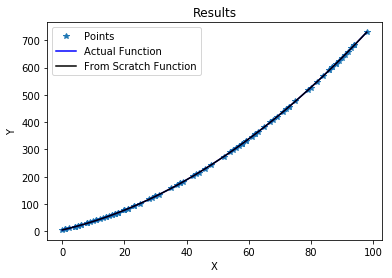

In [10]:
yActual = coeffActual[0] + coeffActual[1]*x + coeffActual[2]*x*x
yScratch = coeffScratch[0] + coeffScratch[1]*x + coeffScratch[2]*x*x
plt.plot(x,y,'*',label='Points')
plt.plot(x,yActual,color='b',linestyle='-',label='Actual Function')
plt.plot(x,yScratch,color='k',linestyle='-',label='From Scratch Function')
plt.legend(loc='best')
plt.title('Results')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [11]:
varianceScratch = 0
varianceActual = 0

for i in range(0, len(A)):
    varianceScratch = abs(yScratch[i] - y[i])
    varianceActual = abs(yActual[i] - y[i])

In [12]:
varianceScratch

0.07549952070792187

In [13]:
varianceActual

0.07484947412319798

The variance my my function was higher than the function from Numpy. The coefficients were also higher on my function. 